# ADLxMLDS HW0 Fashion MINST
https://docs.google.com/presentation/d/1wDkt52UAdVyjhkSAGcvk8O9ZxjDvUNWlt3vHqSF1kWM/edit#slide=id.g2626a5ce99_0_12

In [202]:
# coding=utf-8
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import binascii
import random

- Training data:
    - train-images-idx3-ubyte.gz: training set images (60000 images)
        - ignore first 16 bytes
        - 784 bytes for each image (28*28)  -  0~255
        - 60000 images
        - same format in testing image file (10000 data)
    - train-labels-idx1-ubyte.gz: training set labels (60000 labels)
        - ignore first 8 bytes
        - 60000 bytes for 60000 int  -  0~9
        
- Testing data:
    - t10k-images-idx3-ubyte.gz: testing set images (10000 images)



| Label  | Description    |
|--------|----------------|
| 0      | T-shirt / top  |
| 1      | Trouser        |
| 2      | Pullover       |
| 3      | Dress          |
| 4      | Coat           |
| 5      | Sandal         |
| 6      | Shirt          |
| 7      | Sneaker        |
| 8      | Bag            |
| 9      | Ankle boot     |

In [170]:
data_dir = "data/"
file_list = ["t10k-images-idx3-ubyte", "train-images-idx3-ubyte", "train-labels-idx1-ubyte"]
label_dict = {0:"T-shirt / top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4: "Coat",
             5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

# 讀取圖片資料
image_list = []
with open( data_dir + file_list[1] , "rb") as f:
    byte = f.read(16) # ignore 16 byte
    while byte != b"":
        image = []
        for i in range(784):
            byte = f.read(1)
            b = int.from_bytes(byte, byteorder='big')
            image.append(b)
        image_list.append(image)

# 讀取 Label 資料
label_list = []
with open( data_dir + file_list[2] , "rb") as f:
    byte = f.read(8) # ignore 8 byte
    while byte != b"":
        byte = f.read(1)
        b = int.from_bytes(byte, byteorder='big')
        label_list.append(b)

In [171]:
byte =  binascii.hexlify(byte)

In [172]:
byte

b''

In [173]:
int.from_bytes(byte, byteorder='big')

0

In [188]:
print(len(image_list))
print(len(label_list))

60001
60001


查看第一張圖片與 label 

In [174]:
img = np.array(image_list[0]).reshape(28,28)
label_dict[label_list[0]]

'Ankle boot'

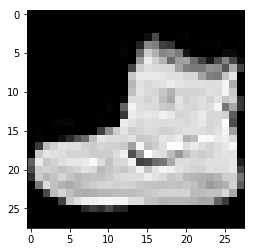

In [175]:
plt.imshow(img, cmap='gray')

查看第二張圖片與 label 

In [176]:
img = np.array(image_list[1]).reshape(28,28)
label_dict[label_list[1]]

'T-shirt / top'

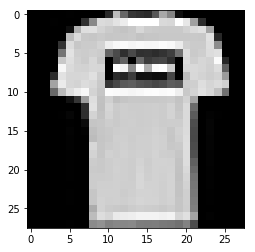

In [177]:
plt.imshow(img, cmap='gray')

查看第三張圖片與 label 

Sandal


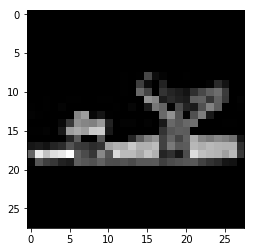

In [178]:
img = np.array(image_list[59999]).reshape(28,28)
print(label_dict[label_list[59999]])
plt.imshow(img, cmap='gray')

## 使用普通的 DNN 去訓練分類器
- 訓練資料集 60000 張
- 沒有驗證資料集

In [189]:
# test remove the last one image item
image_list2 = np.array(image_list[:-1])
image_list2.shape

(60000, 784)

In [190]:
# normalization
x_train = image_list2 / 255.

In [191]:
x_train.shape

(60000, 784)

In [192]:
y_train = np.array(label_list[:-1])
y_train.shape

(60000,)

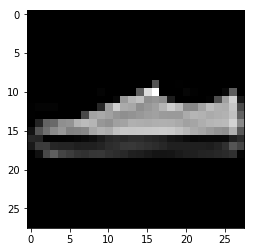

In [196]:
# 隨機印出一張圖片
example = random.randint(1, len(x_train))
plt.imshow(np.asarray(x_train[example].reshape(28,28)), cmap='gray')
plt.show()

In [198]:
# 此圖片的 label 數字為
y_train[example]

7

In [199]:
# label 名字為
label_dict[y_train[example]]

'Sneaker'

In [203]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_train[example]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [204]:
## 建構神經網路架構
model = Sequential([
    Dense(32, input_dim=784),  # 輸入參數為 784 (28*24)，hidden layer 有一層，有 32 個 nodes
    Activation('relu'),
    Dense(10),  # 最後的 ouput layer 有 10 個 nodes 對應到 10 個分類 (0~9)
    Activation('softmax'),
])

In [205]:
## 設定優化器 optimizer 與評估函數 loss function 的種類
model.compile(
              optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [206]:
## 開始訓練：設定 epochs 與 batch_size
# epochs: the number of epochs to train the model
# batch_size: Number of samples per gradient update
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.5400 - acc: 0.8161     
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.4100 - acc: 0.8547     
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.3756 - acc: 0.8671     
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.3575 - acc: 0.8724     
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.3407 - acc: 0.8779     
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.3298 - acc: 0.8811     
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.3184 - acc: 0.8846     
Epoch 8/10
60000/60000 [==============================] - 3s - loss: 0.3117 - acc: 0.8866     
Epoch 9/10
60000/60000 [==============================] - 3s - loss: 0.3053 - acc: 0.8899     
Epoch 10/10
60000/60000 [==============================] - 3s - loss: 0.2977 - acc: 0.8931     


## 修改訓練與驗證的 Dataset
- 訓練資料集 50000 張圖片
- 驗證資料集 10000 張圖片

In [212]:
# 訓練資料集 50000 張
x_train = np.array(image_list[:-10001])
y_train = np.array(label_list[:-10001])

In [213]:
x_train = x_train / 255.
x_train.shape

(50000, 784)

In [215]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_train.shape

(50000, 10)

In [216]:
# 驗證資料集 10000 張
x_test = np.array(image_list[50000:-1])
y_test = np.array(label_list[50000:-1])

In [211]:
x_test = x_test / 255.
x_test.shape

(10000, 784)

In [217]:
y_test = np_utils.to_categorical(y_test, num_classes=10)
y_test.shape

(10000, 10)

In [218]:
## 建構神經網路架構
model = Sequential([
    Dense(32, input_dim=784),  # 輸入參數為 784 (28*24)，hidden layer 有一層，有 32 個 nodes
    Activation('relu'),
    Dense(10),  # 最後的 ouput layer 有 10 個 nodes 對應到 10 個分類 (0~9)
    Activation('softmax'),
])

In [219]:
## 設定優化器 optimizer 與評估函數 loss function 的種類
model.compile(
              optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [220]:
## 開始訓練：設定 epochs 與 batch_size
# epochs: the number of epochs to train the model
# batch_size: Number of samples per gradient update
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
50000/50000 [==============================] - 3s - loss: 0.5753 - acc: 0.8014     
Epoch 2/10
50000/50000 [==============================] - 2s - loss: 0.4262 - acc: 0.8516     
Epoch 3/10
50000/50000 [==============================] - 2s - loss: 0.3934 - acc: 0.8610     
Epoch 4/10
50000/50000 [==============================] - 2s - loss: 0.3704 - acc: 0.8682     
Epoch 5/10
50000/50000 [==============================] - 2s - loss: 0.3532 - acc: 0.8724     
Epoch 6/10
50000/50000 [==============================] - 2s - loss: 0.3427 - acc: 0.8770     
Epoch 7/10
50000/50000 [==============================] - 2s - loss: 0.3304 - acc: 0.8810     
Epoch 8/10
50000/50000 [==============================] - 3s - loss: 0.3214 - acc: 0.8840     
Epoch 9/10
50000/50000 [==============================] - 2s - loss: 0.3130 - acc: 0.8871     
Epoch 10/10
50000/50000 [==============================] - 2s - loss: 0.3064 - acc: 0.8890     


In [221]:
## 印出在 testing dataset 的 loss 與 accuracy
loss, accuracy = model.evaluate(x_test, y_test)

 8768/10000 [=========================>....] - ETA: 0s

In [222]:
print('test loss:', loss)
print('test accuracy:', accuracy)

test loss: 2.74028904381
test accuracy: 0.8273


#### 顯示測試資料的結果圖

In [223]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
# 取得所有 test data 的分類結果分別屬於哪一個 Class 
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test.argmax(1))[0]
incorrect_indices = np.nonzero(predicted_classes != y_test.argmax(1))[0]

 9696/10000 [============================>.] - ETA: 0s

In [224]:
# 印出前十筆分類結果查看
predicted_classes[:10]

array([9, 2, 1, 0, 2, 7, 9, 3, 1, 1])

In [225]:
# 將 np_utils.to_categorical 轉回原形的方法
y_test.argmax(1)[:10] # 印出前十筆資料

array([9, 2, 1, 0, 2, 7, 9, 3, 1, 1])

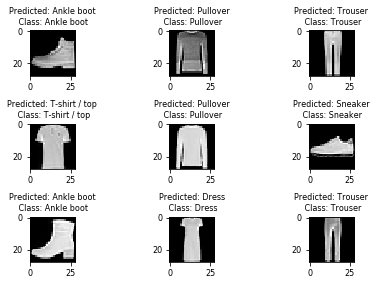

In [230]:
# 顯示分類正確的圖片
plt.rcParams.update({'font.size': 8}) # 設定文字大小
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\n Class: {}".format(label_dict[predicted_classes[correct]], label_dict[y_test.argmax(1)[correct]]),fontsize=8)
plt.tight_layout() # 設定圖片排版

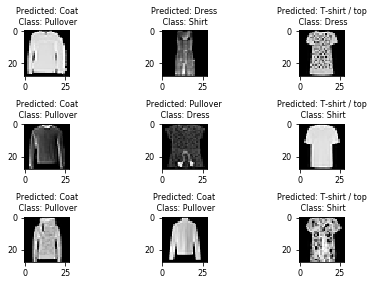

In [231]:
# 顯示分類錯誤的圖片
plt.rcParams.update({'font.size': 8}) # 設定文字大小
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\n Class: {}".format(label_dict[predicted_classes[incorrect]], label_dict[y_test.argmax(1)[incorrect]]),fontsize=8)
plt.tight_layout() # 設定圖片排版